<h2>永恒的建模经验</h2>
先搜集一些温度数据，我们需要预测温度的温标

In [2]:
import torch
# t_c摄氏度为单位的温度， t_u未知单位的温度
t_c = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0])
t_u = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4])
assert(len(t_c) == len(t_u))

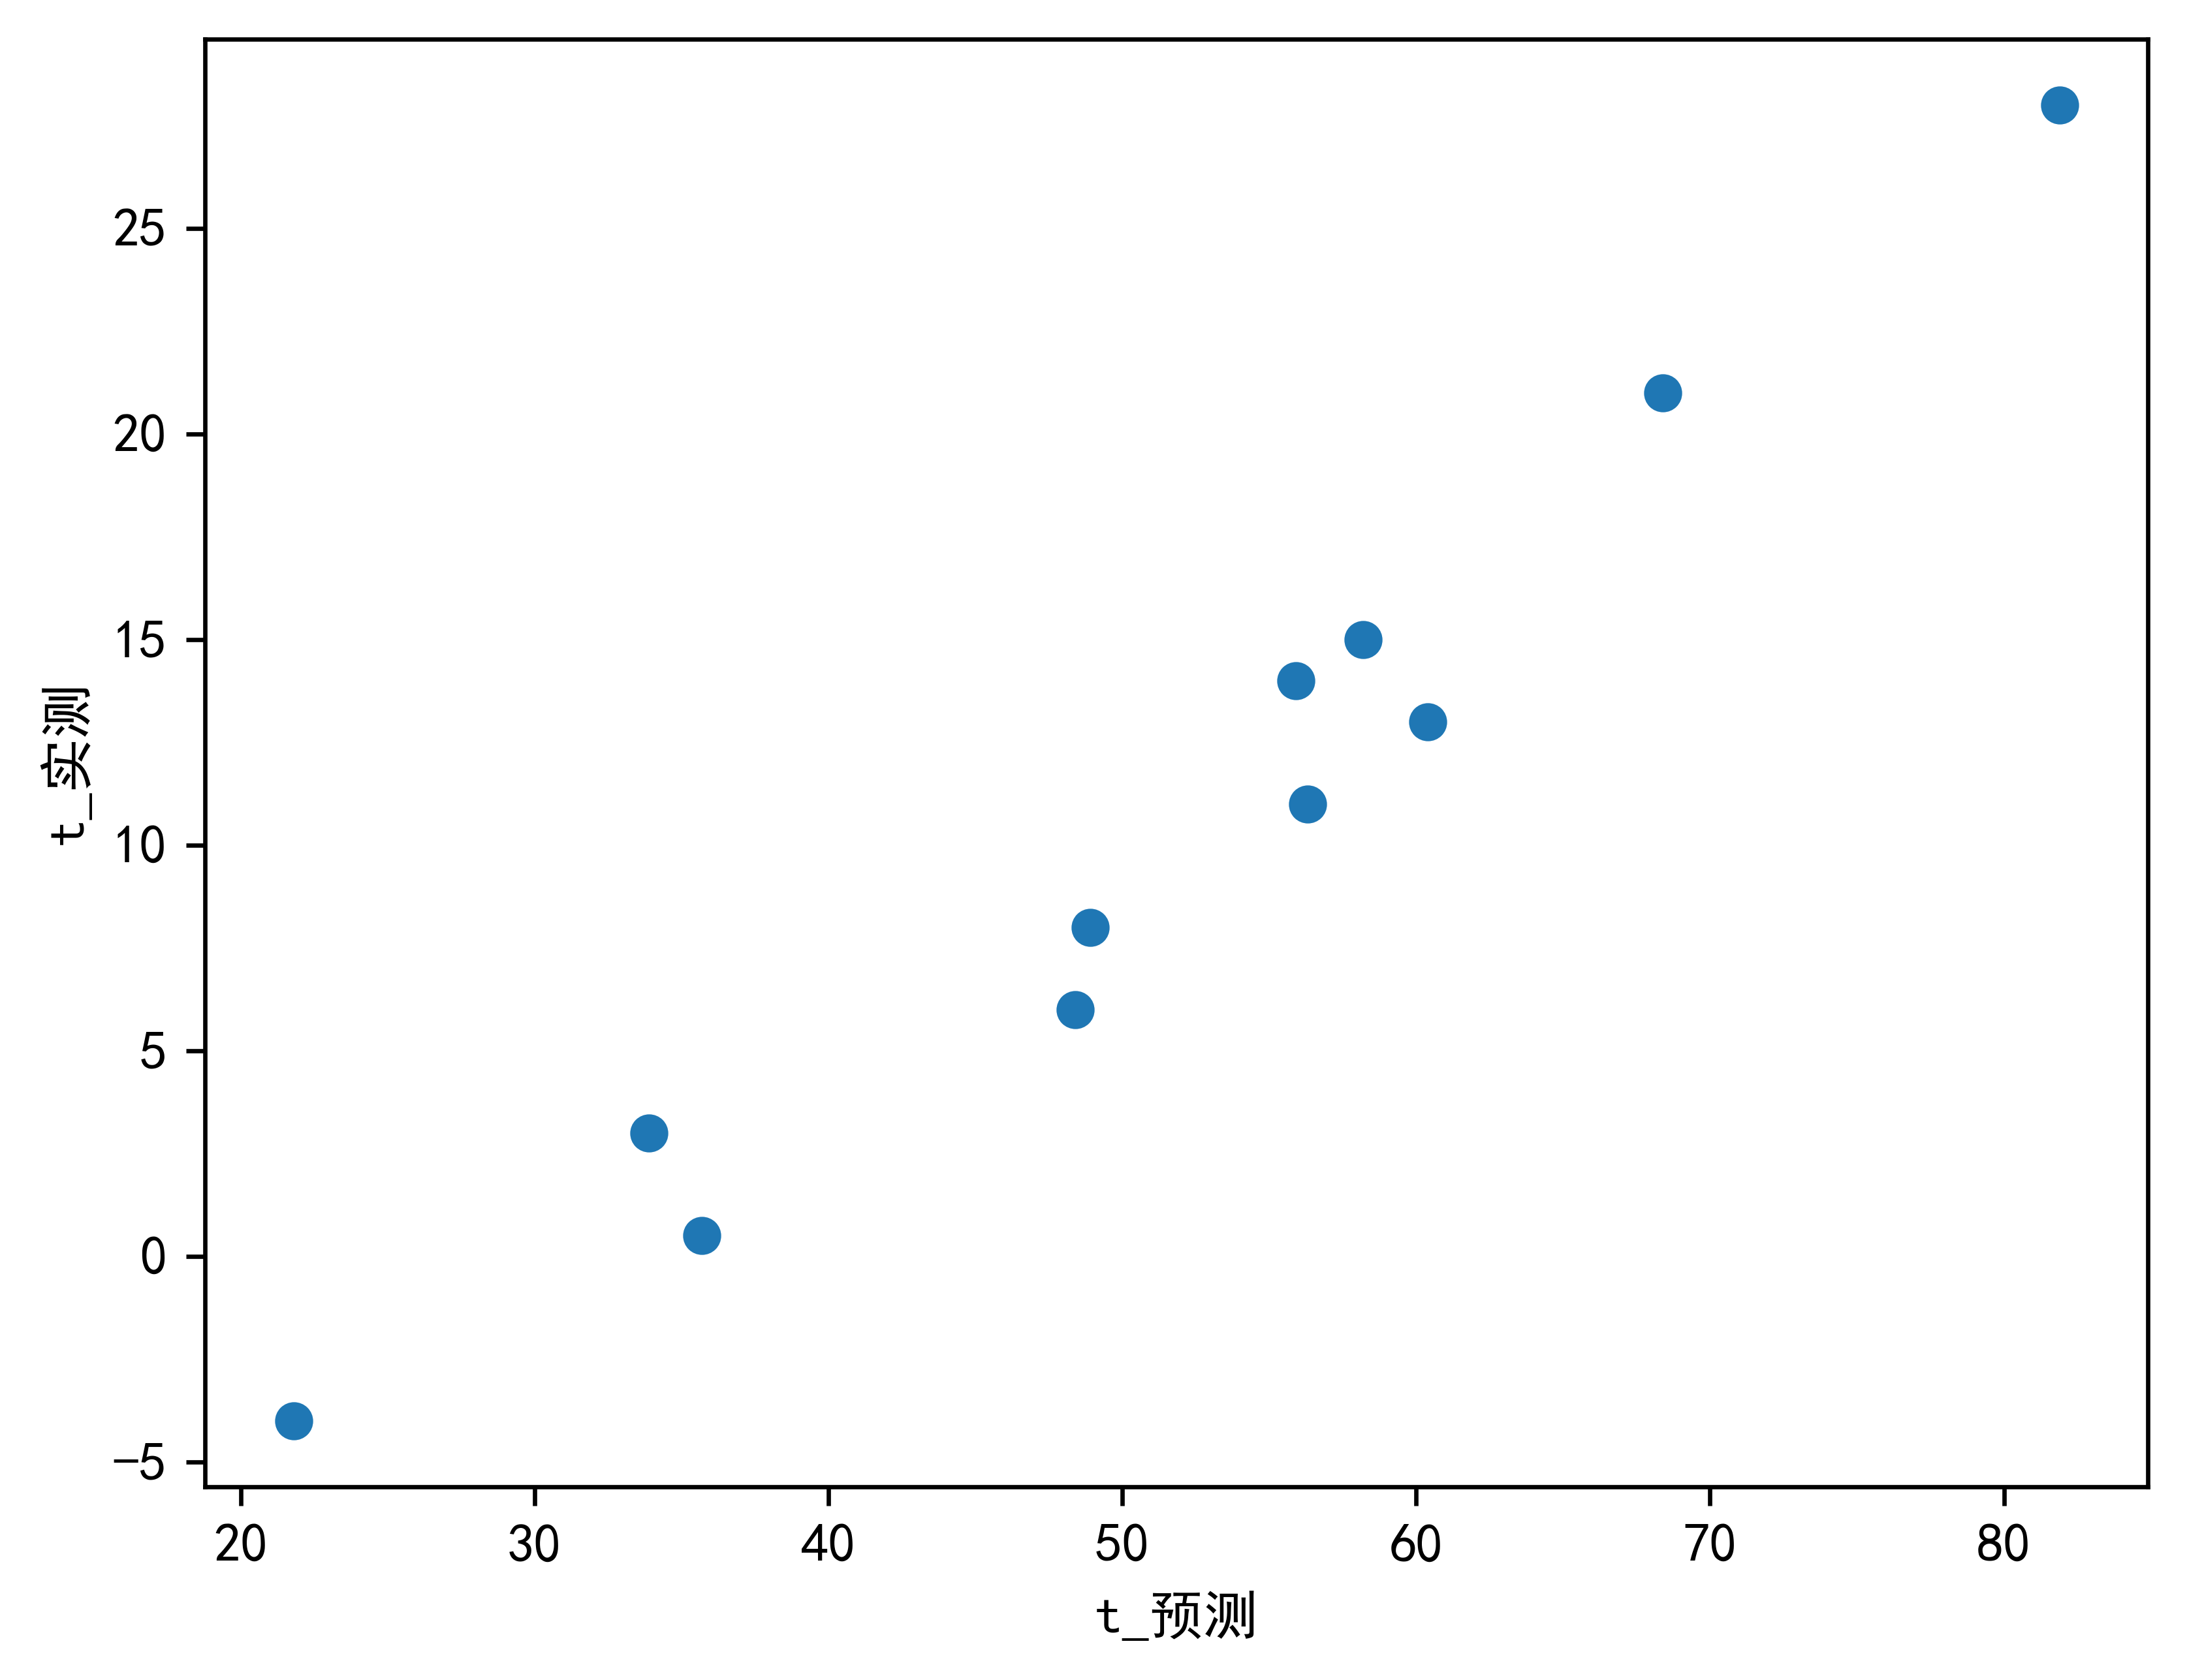

In [5]:
# 我们画出图像试试
from matplotlib import pyplot as plt
import numpy as np
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体为宋体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示为方块的问题
plt.figure(dpi=600)
plt.xlabel('t_预测')
plt.ylabel('t_实测')
plt.plot(t_u.numpy(), t_c.numpy(), 'o')

In [15]:
def model(t_u, w, b):
    return w * t_u + b


def loss_fn(t_p, t_c):
    squared_diffs = (t_p-t_c)**2
    return squared_diffs.mean()

def dloss_fn(t_p, t_c):
    dsq_diffs = 2*(t_p-t_c) / t_p.size(0) # 这里除以size是因为我们的误差取了平均
    return dsq_diffs


def dmodel_dw(t_u, w, b):
    dmodel_dw = t_u
    return dmodel_dw


def dmodel_db(t_u, w, b):
    dmodel_db = 1
    return dmodel_db

def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])


In [32]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(n_epochs):
        w, b = params
        t_p = model(t_u, w, b) # 前向传播
        loss = loss_fn(t_p, t_c) # 计算损失
        grad = grad_fn(t_u, t_c, t_p, w, b) # 反向传播
        params = params-learning_rate*grad
        if (epoch+1) % 10 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
    return t_p, params


In [33]:
n_epochs = 1000
learning_rate = 0.01
t_un = t_u * 0.1
t_p, params = training_loop(n_epochs=n_epochs, 
              learning_rate=learning_rate,
              params=torch.tensor([1.0, 0.0]),
              t_u = t_un,
              t_c = t_c)

Epoch 9, Loss 29.030489
Epoch 19, Loss 28.157804
Epoch 29, Loss 27.314295
Epoch 39, Loss 26.498987
Epoch 49, Loss 25.710938
Epoch 59, Loss 24.949236
Epoch 69, Loss 24.212999
Epoch 79, Loss 23.501379
Epoch 89, Loss 22.813549
Epoch 99, Loss 22.148710
Epoch 109, Loss 21.506102
Epoch 119, Loss 20.884981
Epoch 129, Loss 20.284624
Epoch 139, Loss 19.704336
Epoch 149, Loss 19.143446
Epoch 159, Loss 18.601313
Epoch 169, Loss 18.077301
Epoch 179, Loss 17.570814
Epoch 189, Loss 17.081255
Epoch 199, Loss 16.608067
Epoch 209, Loss 16.150694
Epoch 219, Loss 15.708612
Epoch 229, Loss 15.281317
Epoch 239, Loss 14.868304
Epoch 249, Loss 14.469097
Epoch 259, Loss 14.083236
Epoch 269, Loss 13.710278
Epoch 279, Loss 13.349789
Epoch 289, Loss 13.001349
Epoch 299, Loss 12.664559
Epoch 309, Loss 12.339031
Epoch 319, Loss 12.024384
Epoch 329, Loss 11.720258
Epoch 339, Loss 11.426300
Epoch 349, Loss 11.142170
Epoch 359, Loss 10.867537
Epoch 369, Loss 10.602086
Epoch 379, Loss 10.345510
Epoch 389, Loss 10.0975

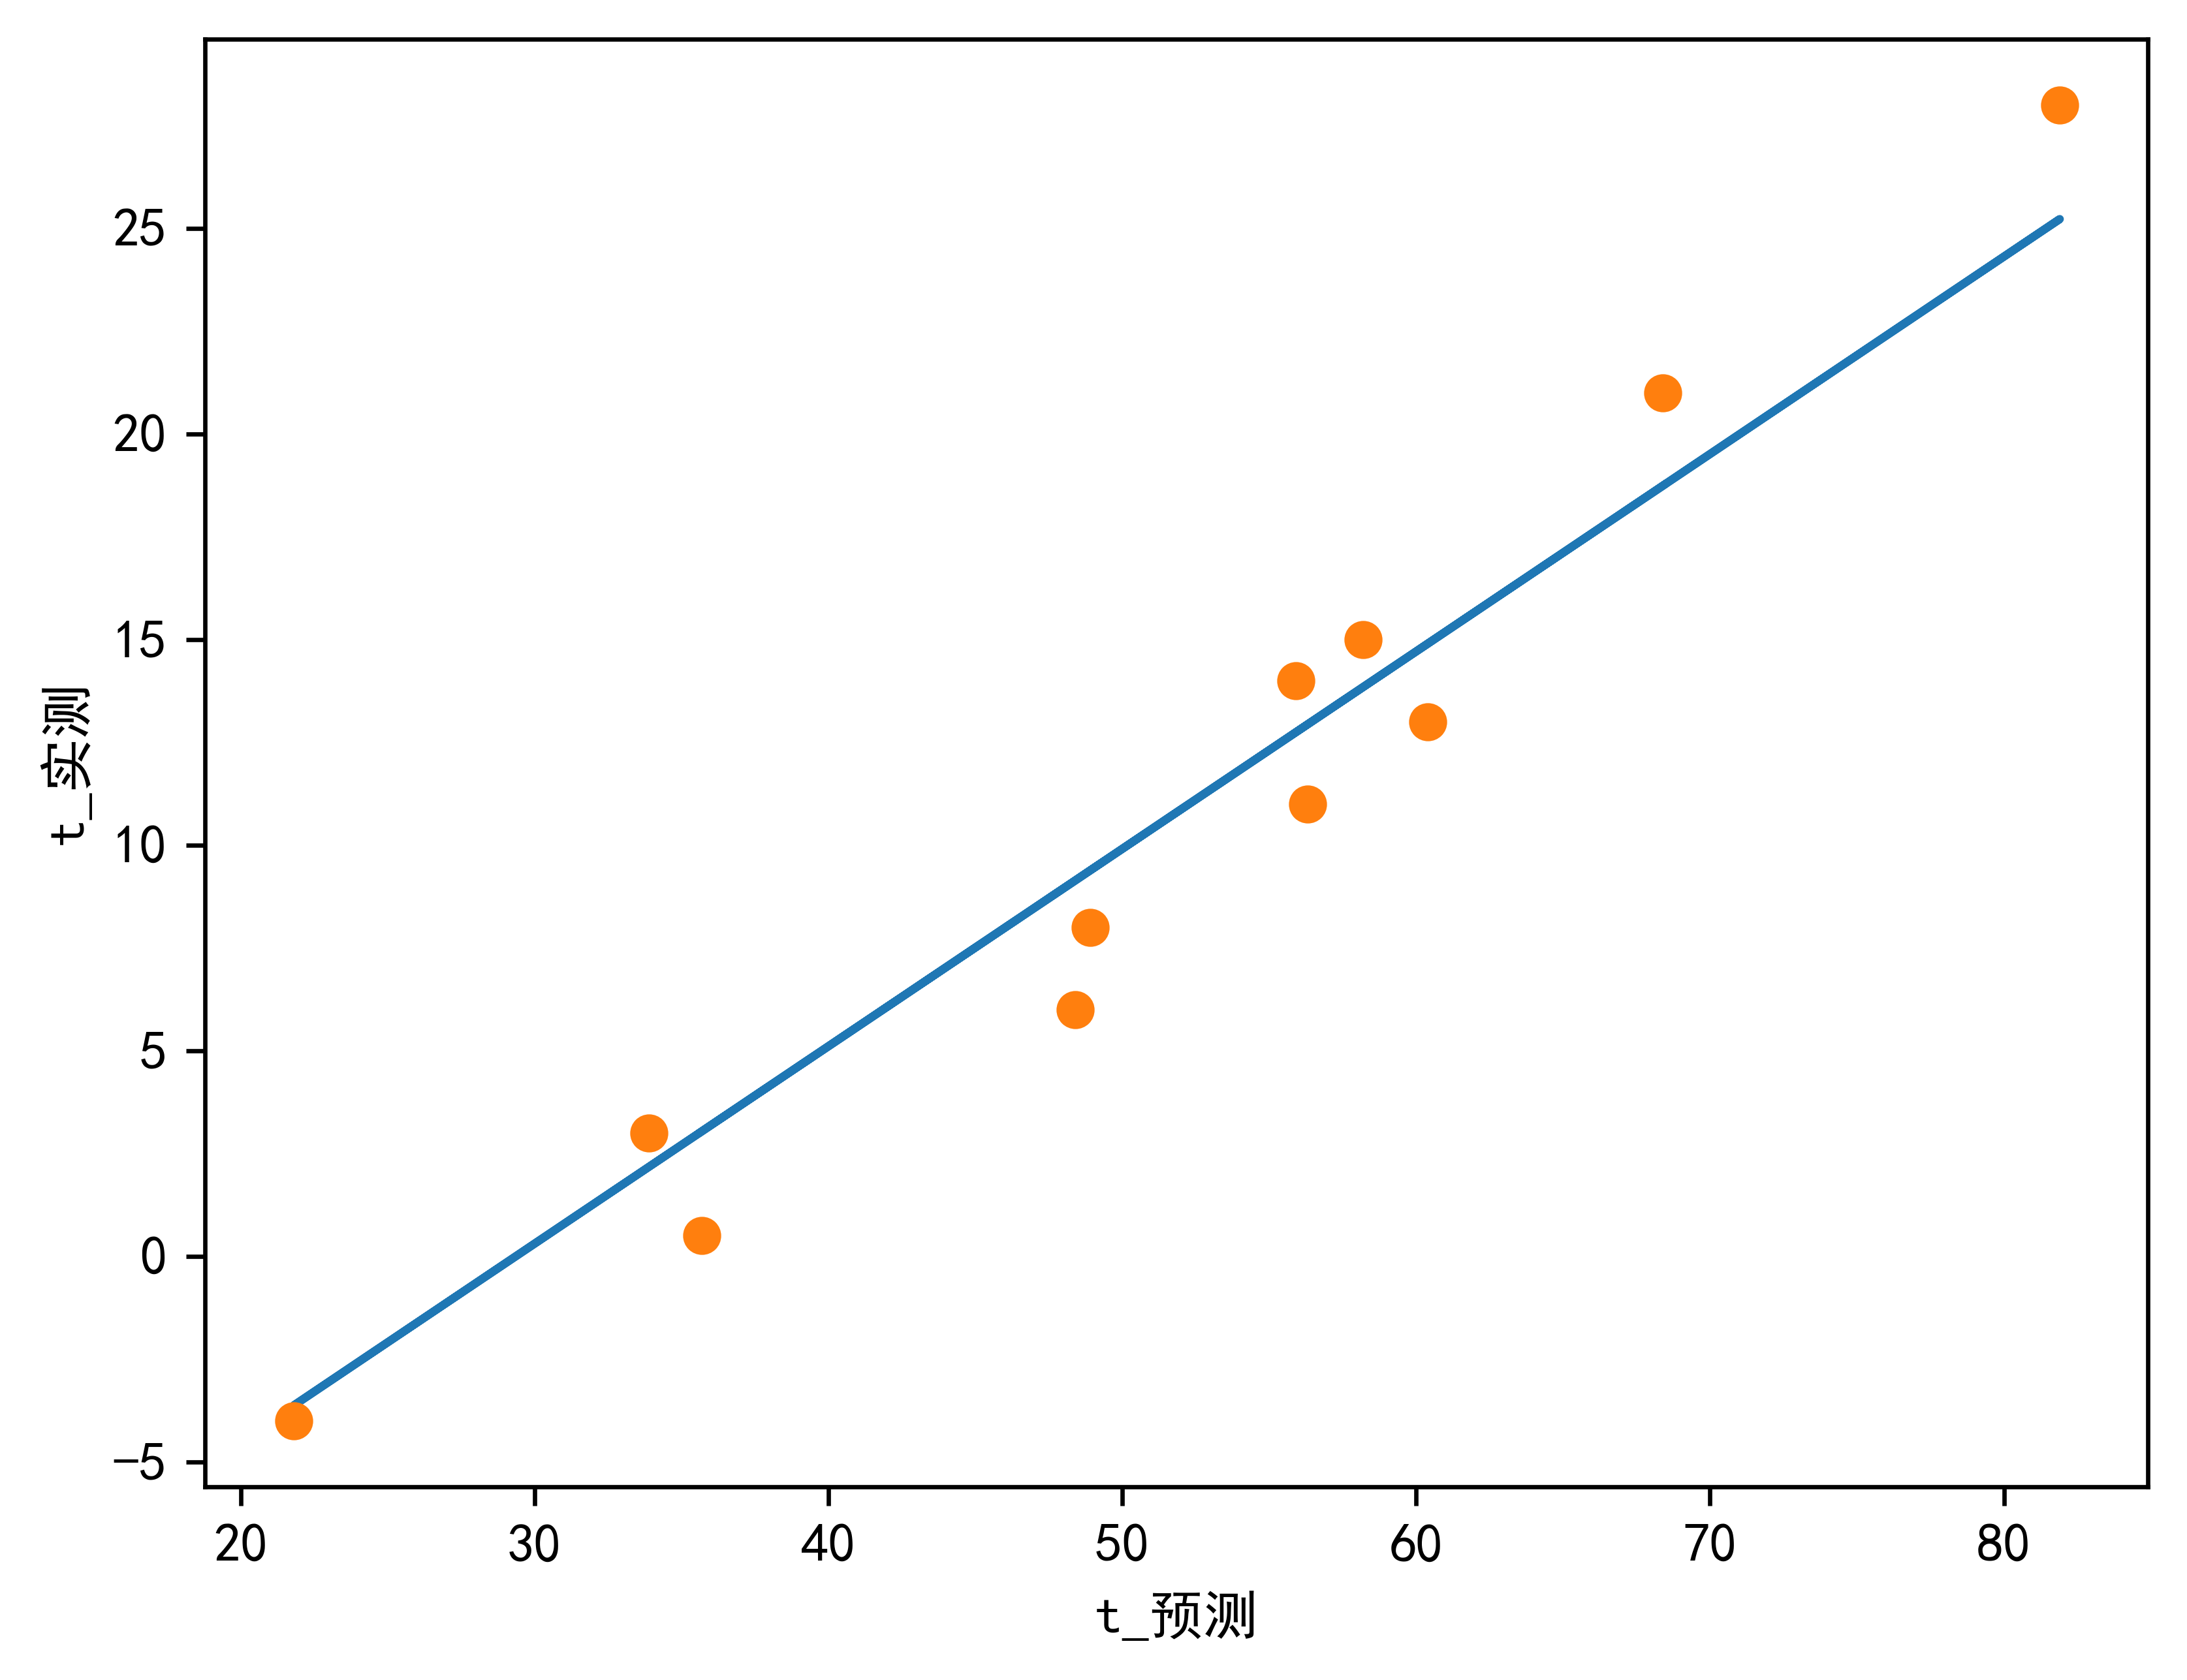

In [34]:
plt.figure(dpi=600)
plt.xlabel('t_预测')
plt.ylabel('t_实测')
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')

In [35]:
params

tensor([  4.8021, -14.1031])